In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm 
import seaborn as sns


In [6]:
data= pd.read_excel(r"C:\Users\Lenovo\Downloads\Discrete_Cake.xls")

In [7]:
# subset data
datac1= data.iloc[:,1:8]

In [8]:
# Cleaning the data subset

# Drop rows with NaN values
datac1 = datac1.dropna()

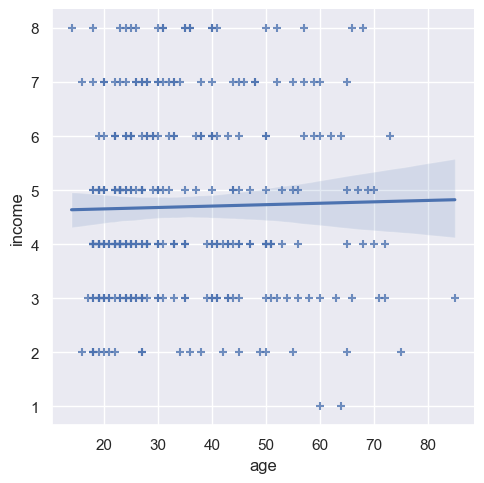

In [9]:
# 3 plotting the relationship
# plot fitted line
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set(style='darkgrid')
sns.lmplot(data=datac1, x='age', y='income', fit_reg=True,markers='+')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,RidgeCV,lasso_path,LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [11]:
##use the data for training
x=datac1.iloc[:,1:6]  ##
y=datac1['children']  #

In [12]:
# 4 Train Test data 

##samle spit for training and tesing
x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=0.7,random_state=10)
##print dimension of train and test samples
print("the dimension of x_train is {}".format(x_train.shape))
print("the dimension of x_test is {}".format(x_test.shape))


the dimension of x_train is (89, 5)
the dimension of x_test is (208, 5)


In [13]:
##train logit model 
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l2',C=10,random_state=0) ##penalty:l1 regularization
lr.fit(x_train,y_train)

LogisticRegression(C=10, random_state=0)

In [14]:
# classification tree

from sklearn import tree, metrics
##entropy method
clr=tree.DecisionTreeClassifier(criterion='entropy',random_state=0)  ##other criteirion=gini...
clr.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [15]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rlr=RandomForestClassifier(n_estimators=10,random_state=0)  
rlr.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [16]:
# Support Vector machine
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)  
svm.fit(x_train, y_train)


SVC(kernel='linear', random_state=0)

In [17]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn.fit(x_train, y_train)


KNeighborsClassifier()

In [ ]:
# Question No 5
# Shapely value and plotting

In [44]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


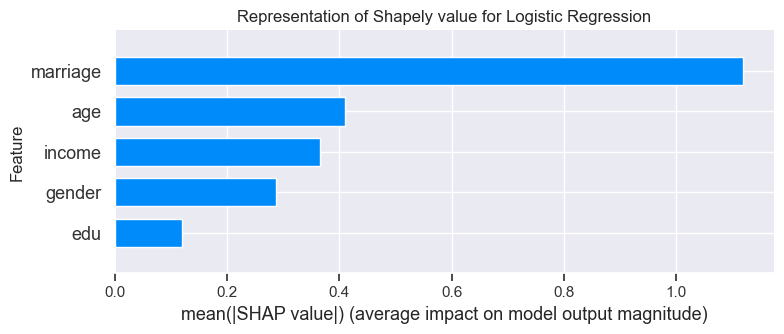

In [45]:
# For Logit algorithm
import shap
shap_values = shap.LinearExplainer(lr, x_train).shap_values(x_train)
plt.title("Representation of Shapely value for Logistic Regression")
plt.xlabel("Shapley Value")
plt.ylabel("Feature")
shap.summary_plot(shap_values, x_train, plot_type="bar")
# Add x-axis and y-axis labels


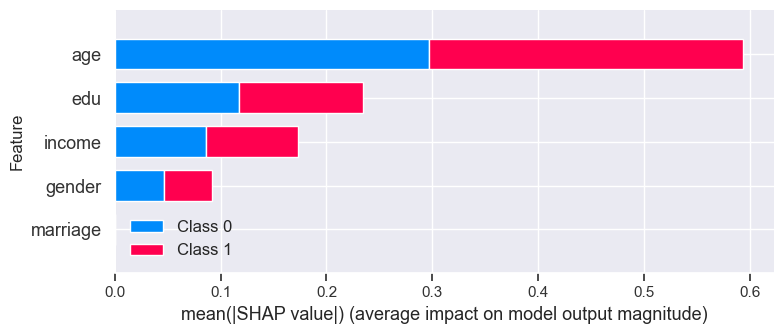

In [52]:
# for classification tree
# Creation TreeExplainer and compute Shapley values
explainer = shap.TreeExplainer(clr)
shap_values = explainer.shap_values(x_train)

# Plot Shapley values for each class separately
# Add x-axis and y-axis labels
plt.xlabel("Shapley Value")
plt.ylabel("Feature")
shap.summary_plot(shap_values, x_train, plot_type="bar")


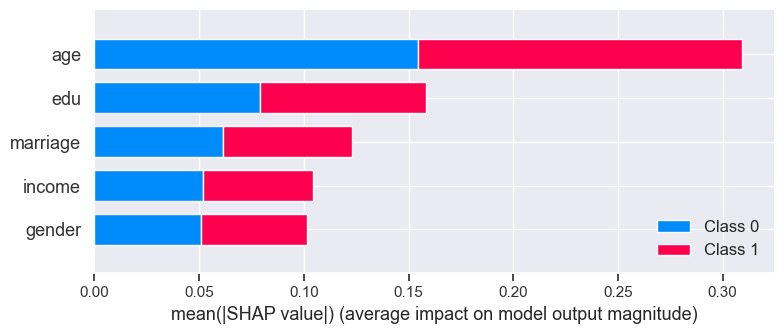

In [55]:
# for random forest 

##Shapley value
import shap
#Creation TreeExplainer and compute Shapley values
explainer = shap.TreeExplainer(rlr)
shap_values = explainer.shap_values(x_train)


#shap_values = shap.TreeExplainer(rlr).shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type="bar")

  0%|          | 0/89 [00:00<?, ?it/s]

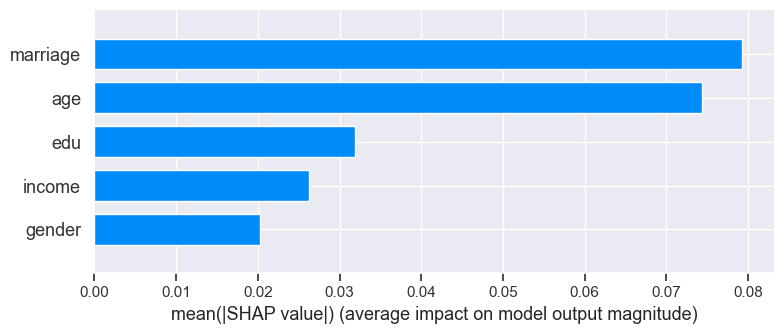

In [ ]:
# for SVM 
import shap

shap_values = shap.KernelExplainer(svm.predict,x_train).shap_values(x_train)
plt.title("Representation of Shapely value for Support Vector Machine")
plt.xlabel("Shapley Value")
plt.ylabel("Feature")
shap.summary_plot(shap_values, x_train, plot_type="bar")


  0%|          | 0/89 [00:00<?, ?it/s]

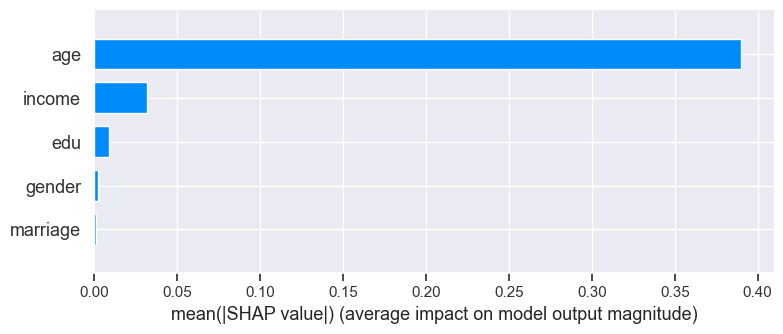

In [18]:
# for KNN

import shap
#shap_values = shap.KernelExplainer(lr).shap_values(x1)
shap_values = shap.KernelExplainer(knn.predict,x_train).shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type="bar")

In [23]:
# Confusion matrix
#confusion matrices are commonly used to evaluate the performance of a binary classification model. 
# From these matrices, you can compute various metrics such as accuracy, precision, recall, and F1-score, 
# which provide a more comprehensive understanding of how well the model is performing on both the training and testing 

# for logit
print("Train_confusion matrix:",metrics.confusion_matrix(y_train,lr.predict(x_train)))
print("Test_confusion matrix:",metrics.confusion_matrix(y_test,lr.predict(x_test)))


Train_confusion matrix: [[52  7]
 [18 12]]
Test_confusion matrix: [[129  15]
 [ 42  22]]


In [24]:
# for classification 
print("Train_confusion matrix:",metrics.confusion_matrix(y_train,clr.predict(x_train)))
print("Test_confusion matrix:",metrics.confusion_matrix(y_test,clr.predict(x_test)))



Train_confusion matrix: [[59  0]
 [ 2 28]]
Test_confusion matrix: [[99 45]
 [26 38]]


In [25]:
# for random forest
print("Train_confusion matrix:",metrics.confusion_matrix(y_train,rlr.predict(x_train)))
print("Test_confusion matrix:",metrics.confusion_matrix(y_test,rlr.predict(x_test)))



Train_confusion matrix: [[58  1]
 [ 7 23]]
Test_confusion matrix: [[113  31]
 [ 38  26]]


In [26]:
# for SVM forest
print("Train_confusion matrix:",metrics.confusion_matrix(y_train,svm.predict(x_train)))
print("Test_confusion matrix:",metrics.confusion_matrix(y_test,svm.predict(x_test)))

Train_confusion matrix: [[59  0]
 [29  1]]
Test_confusion matrix: [[143   1]
 [ 60   4]]


In [27]:
# for KNN
print("Train_confusion matrix:",metrics.confusion_matrix(y_train,knn.predict(x_train)))
print("Test_confusion matrix:",metrics.confusion_matrix(y_test,knn.predict(x_test)))

Train_confusion matrix: [[51  8]
 [12 18]]
Test_confusion matrix: [[105  39]
 [ 26  38]]


QUESTION NO 2

In [29]:
df= pd.read_excel(r"C:\Users\Lenovo\Downloads\APU0000708111.xls")

Text(0.5, 1.0, 'Average Egg Price Over Time')

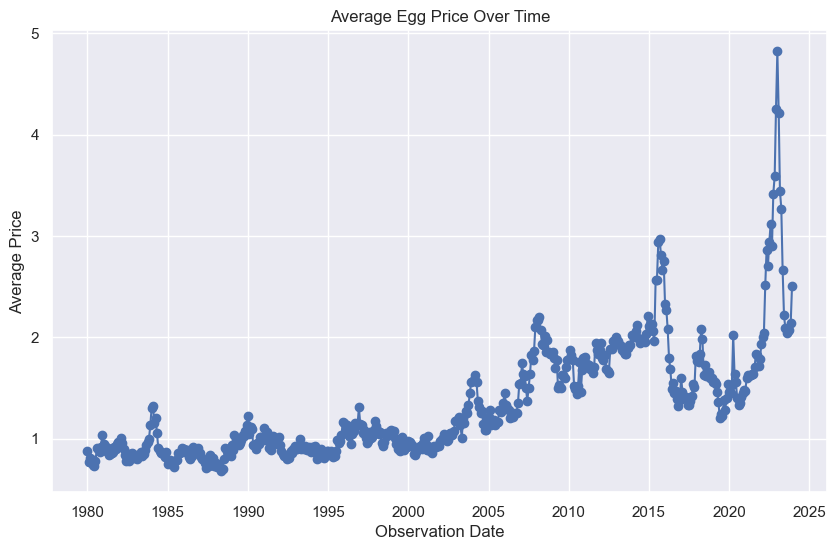

In [31]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df['observation_date'], df['Average Price'], marker='o', linestyle='-')

# Adding the  labels and title
plt.xlabel('Observation Date')
plt.ylabel('Average Price')
plt.title('Average Egg Price Over Time')



Epoch 1/10
33/33 [==============================] - 3s 13ms/step - loss: 0.0044
Epoch 2/10
33/33 [==============================] - 0s 12ms/step - loss: 0.0013
Epoch 3/10
33/33 [==============================] - 0s 11ms/step - loss: 0.0011
Epoch 4/10
33/33 [==============================] - 0s 13ms/step - loss: 9.7374e-04
Epoch 5/10
33/33 [==============================] - 0s 12ms/step - loss: 9.4450e-04
Epoch 6/10
33/33 [==============================] - 0s 13ms/step - loss: 8.9973e-04
Epoch 7/10
33/33 [==============================] - 0s 12ms/step - loss: 9.1980e-04
Epoch 8/10
33/33 [==============================] - 0s 14ms/step - loss: 8.1313e-04
Epoch 9/10
33/33 [==============================] - 0s 13ms/step - loss: 8.8921e-04
Epoch 10/10
33/33 [==============================] - 0s 13ms/step - loss: 7.4368e-04


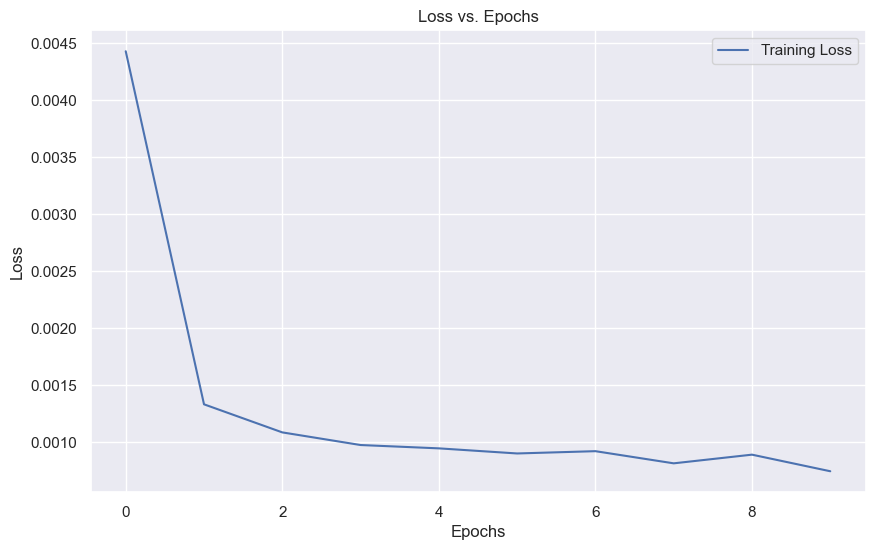

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt



# Convertion of  'observation_date' to datetime format
df['observation_date'] = pd.to_datetime(df['observation_date'])

# Sort the data by date
df = df.sort_values('observation_date')

# Extract the target variable
target_variable = 'Average Price'
y = df[target_variable].values.reshape(-1, 1)

# Extract features and normalize between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
df['Average Price'] = scaler.fit_transform(y)
features = df[['observation_date', 'Average Price']].values

# Normalize the 'observation_date' column separately
date_scaler = MinMaxScaler(feature_range=(0, 1))
df['numerical_date'] = date_scaler.fit_transform(df['observation_date'].values.reshape(-1, 1))

# Create sequences for training
time_steps = 40
train_size = int(len(features) * 0.7)
train, _ = features[0:train_size, :], features[train_size:len(features), :]
trainX, trainY = create_sequences(train, time_steps)
trainX = np.array(trainX).astype(np.float32)
trainY = np.array(trainY).astype(np.float32)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and capture the history
history = model.fit(trainX, trainY, epochs=10, batch_size=10, verbose=1)

# Plot the loss vs. epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [44]:
# question 4 

# Train the model and capture the history
history = model.fit(trainX, trainY, epochs=10, batch_size=10, verbose=1)

# Create sequences for testing
test, _ = features[train_size:, :], features[len(features)-time_steps:len(features), :]
testX, testY = create_sequences(test, time_steps)
testX = np.array(testX).astype(np.float32)
testY = np.array(testY).astype(np.float32)
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# Make predictions on the test set
testPredict = model.predict(testX)

# Inverse transform the predictions and actual values to original scale
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY.reshape(-1, 1))

# Plot the real test data and their predicted values
plt.figure(figsize=(10, 6))

# Plot the original data
plt.plot(df['numerical_date'], scaler.inverse_transform(features)[:, 1], label='Original Data')

# Plot the testing predictions
testPredictPlot = np.empty_like(features)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_steps*2):len(features), 1] = testPredict.ravel()
plt.plot(df['numerical_date'], testPredictPlot[:, 1], label='Testing Predictions', linestyle='--')

# Plot the actual test data
actualTestPlot = np.empty_like(features)
actualTestPlot[:, :] = np.nan
actualTestPlot[len(trainPredict)+(time_steps*2):len(features), 1] = testY.ravel()
plt.plot(df['numerical_date'], actualTestPlot[:, 1], label='Actual Test Data', linestyle='--')

plt.title('Egg Price Prediction with LSTM')
plt.xlabel('Numerical Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()


Epoch 1/10
33/33 [==============================] - 0s 12ms/step - loss: 7.2664e-04
Epoch 2/10
33/33 [==============================] - 0s 14ms/step - loss: 7.2615e-04
Epoch 3/10
33/33 [==============================] - 0s 14ms/step - loss: 6.7044e-04
Epoch 4/10
33/33 [==============================] - 0s 14ms/step - loss: 6.5944e-04
Epoch 5/10
33/33 [==============================] - 0s 12ms/step - loss: 6.4149e-04
Epoch 6/10
33/33 [==============================] - 0s 12ms/step - loss: 6.3797e-04
Epoch 7/10
33/33 [==============================] - 0s 12ms/step - loss: 5.9698e-04
Epoch 8/10
33/33 [==============================] - 0s 13ms/step - loss: 5.8412e-04
Epoch 9/10
33/33 [==============================] - 0s 12ms/step - loss: 5.6774e-04
Epoch 10/10
4/4 [==============================] - 0s 4ms/step


TypeError: float() argument must be a string or a number, not 'Timestamp'

<Figure size 1000x600 with 0 Axes>